# Declaration of Originality

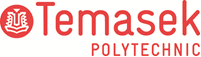

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [26]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly

# 1. Business Understanding
Goal: To predict a person's medical insurance based on their lifestyle and demographic.

# 2. Data Understanding

## 2.1 Load dataset

In [27]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "insurance.csv" 
df = pd.read_csv(FILE_PATH)
df 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 2.2 Summary Statistics

In [28]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
## Check for missing data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

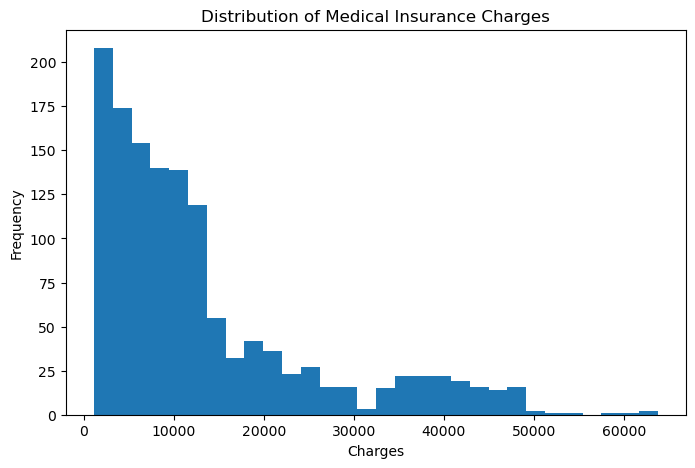

In [30]:
## Understanding distribution of target
plt.figure(figsize=(8, 5))
plt.hist(df["charges"], bins=30)
plt.title("Distribution of Medical Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()


The histogram shows that the insurance cahrges are right-skewed. This measns that most indviduals incur low medical insurance costs while a small number incur extremely high charges.

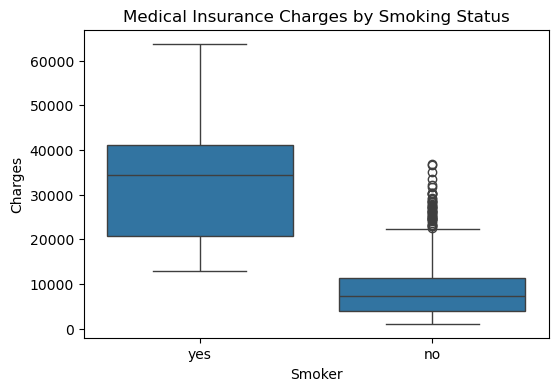

In [31]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="smoker", y="charges")
plt.title("Medical Insurance Charges by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()


The boxplot shows a significant difference in insurance charges between smokers and non-smokers. Smokers have a much higher median insurance charge and a wider spread. This confirms that smoking status is a strong predictor of insurance charges.

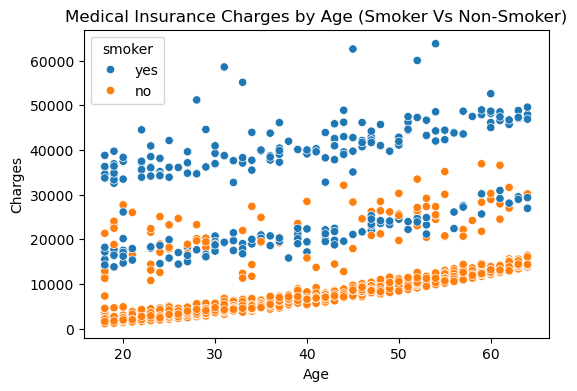

In [32]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="age", y="charges", hue="smoker")
plt.title("Medical Insurance Charges by Age (Smoker Vs Non-Smoker)")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


The scatterplot shows a positive relationship between age and medical insurance charges, with smokers incurring higher costs across age. There are some outliers for non-smoker though. This indicates that smoking status amplifies the effect of age on insurance charges,

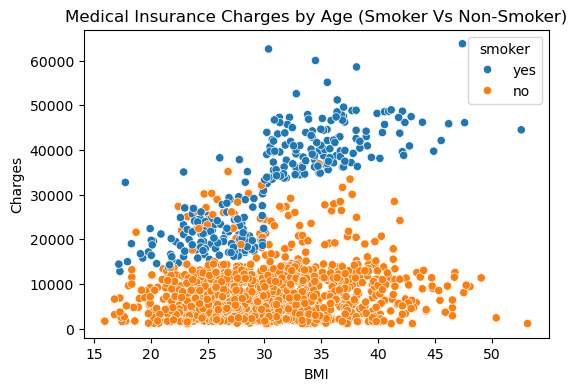

In [33]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker")
plt.title("Medical Insurance Charges by Age (Smoker Vs Non-Smoker)")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()


The scatterplot shows the relationship between BMI and medical insurance charges, differentiated by smoking status. Individuals with higher BMI values tend to incur higher medical insurance charges, especially among smokers. Smokers show significantly higher charges across all BMI ranges, indicating that smokers amplifies the impact of BMI on insurance costs. 

### 2.3.1.2 Understanding distribution of features

In [34]:
## Understanding distribution of features
df_corr = df.copy()

# Encode binary categorical variables for correlation analysis
df_corr['sex'] = df_corr['sex'].map({'male': 1, 'female': 0})
df_corr['smoker'] = df_corr['smoker'].map({'yes': 1, 'no': 0})


### 2.3.2 Understanding relationship between variables

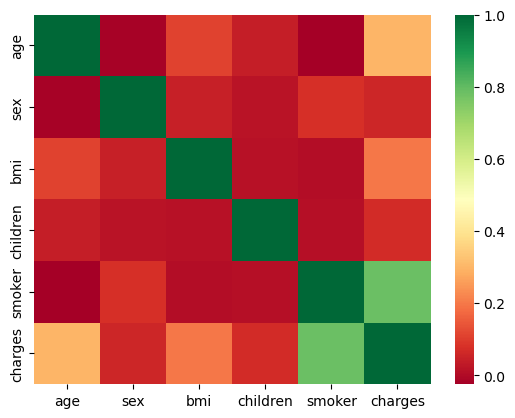

In [35]:
corr_features = ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']

df_corr = df_corr[corr_features].corr()
sns.heatmap(df_corr, cmap="RdYlGn")
plt.show()


Smoking status shows the strongest positive correlation with insurance charges.

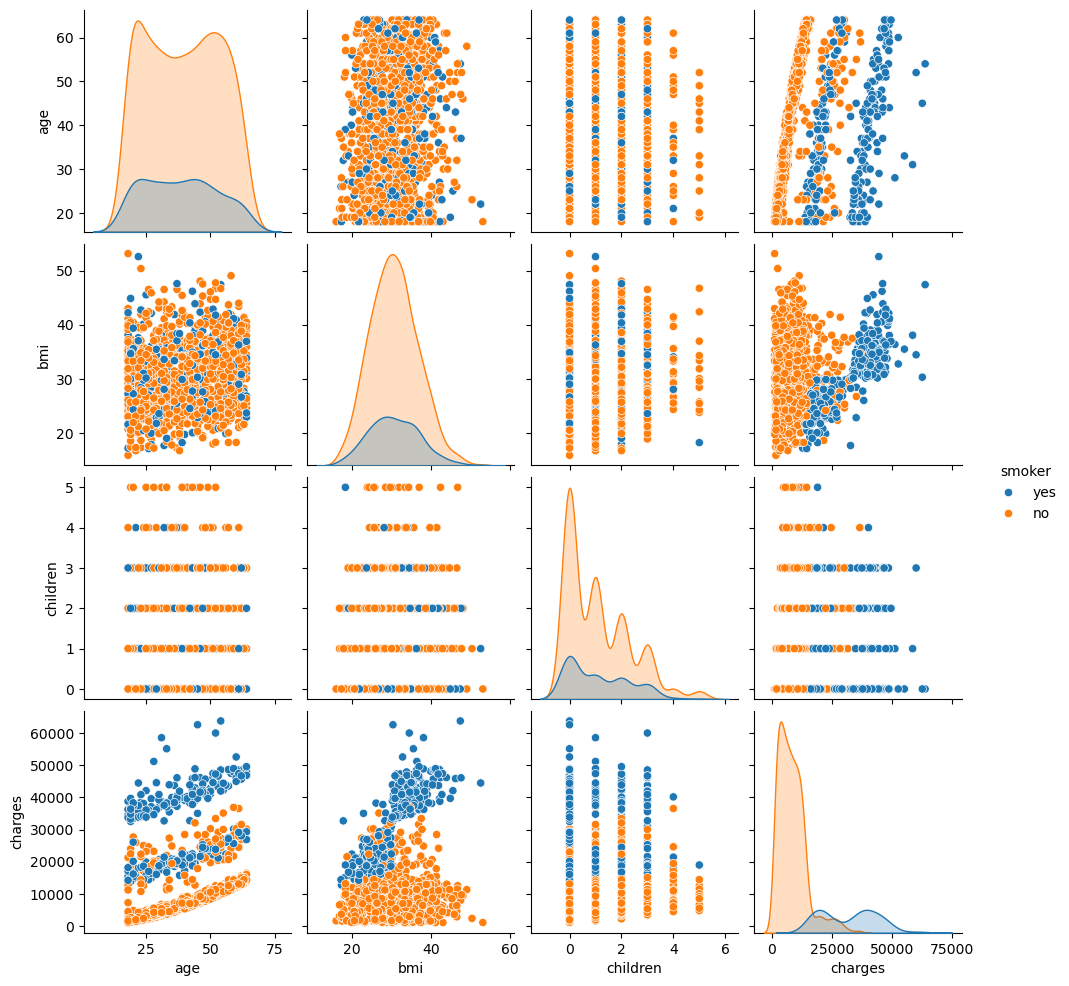

In [36]:
sns.pairplot(
    df,
    vars=["age", "bmi", "children", "charges"],
    hue="smoker",
)
plt.show()


The pairplot shows the relationships between numerical values like age, bmi, children and charges with smoking status as the hue. From the graphs comparing age and charges and BMI and charges, it shows that smokers tend to have higer medical insurance charges. The non-smokers tend to have lower and more clustered medical insurance charge values.

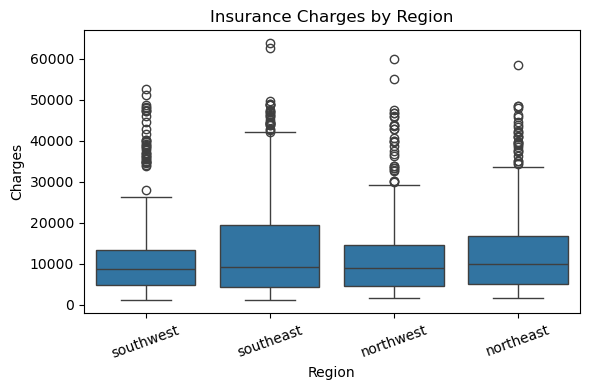

In [37]:
plt.figure(figsize=(6,4))
sns.boxplot(df, x="region", y="charges")
plt.title("Insurance Charges by Region")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


The boxplot shows that the insurance charge distribution across regions are similar, with comparable median values and overlap between interquatile ranges. While all regions contain high medical insurance charge outliers, no region consistently exhibits significantly higher insurance charges. This suggests that region has limited influence on insurance costs when compared to factors like smoking status, age and BMI. Therefore, I have decided to remove the region feature moving on. 

# 3. Data Preparation

## 3.1 Data Cleaning

In [38]:
# Compute median of charges
median_charge = df["charges"].median()

# Replace extreme charges (> 50k) with median
df["charges"] = df["charges"].apply(
    lambda x: median_charge if x > 50000 else x
)


In [39]:
# Drop region as part of feature selection
df_no_region = df.drop(columns=["region"])

col_y = "charges"

y = df_no_region[col_y]
X = df_no_region.drop(columns=[col_y])

X = pd.get_dummies(X, drop_first=True)
X

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,False,True
1,18,33.770,1,True,False
2,28,33.000,3,True,False
3,33,22.705,0,True,False
4,32,28.880,0,True,False
...,...,...,...,...,...
1333,50,30.970,3,True,False
1334,18,31.920,0,False,False
1335,18,36.850,0,False,False
1336,21,25.800,0,False,False


## 3.2 Train-Test Split

In [40]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split

test_size = 0.3
random_state = 2025
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# 4. Modelling

### 4.2 Train Model

In [41]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [42]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


# 5. Model Evaluation

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_dt = dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree MAE:", mae_dt)
print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree R²:", r2_dt)


Decision Tree MAE: 3641.013388258707
Decision Tree RMSE: 7663.716953131769
Decision Tree R²: 0.5319648317028518


The Decision Tree Regressor achieved a MAE of approxiamtely 3324, indicating that the model's predictions deviate from the actual insurance charges by 3324 on average. The RMSE of approximately 6937 shows that there are larger prediction errors present, suggesting that the model struggles with extreme charge values. 

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_rfr = rfr.predict(X_test)

mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
r2_rfr = r2_score(y_test, y_pred_rfr)

print("Random Forest Regressor MAE:", mae_rfr)
print("Random Forest Regressor RMSE:", rmse_rfr)
print("Random Forest Regressor R²:", r2_rfr)


Random Forest Regressor MAE: 2939.1719006940743
Random Forest Regressor RMSE: 5726.565622257189
Random Forest Regressor R²: 0.7386707283406702


The Random Forest Regressor achieved a MAE of approximately 2772, meaning that predictions deviated from the actual by about 2772 on average. The RMSE of around 5040 suggests that this model is better in handling larger errors compared to the Decision Tree model. 

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_gbr = gbr.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting MAE:", mae_gbr)
print("Gradient Boosting RMSE:", rmse_gbr)
print("Gradient Boosting R²:", r2_gbr)



Gradient Boosting MAE: 2787.291102922471
Gradient Boosting RMSE: 5462.959206824728
Gradient Boosting R²: 0.7621761038883124


The Gradient Boosting Regressor achieved the lowest MAE and RMSE among all the tested models, indicating more accurate predictions and reduced sensitivity to extreme medical insurance charges. With and R² score of 0.842, the model explains approximately 84.2% of variance in insurance charges. These results suggest that Gradient Boosting Regressor is more effective at capturing complex, non-linear relationships and feature interactions within the insurance dataset.

The two ensemble models significantly outperform the Decision Tree model, with Gradient Boosting Regressor achieving the best predictive performance. Although Gradient Boosting achieved the lowest RMSE, I selected Random Forest Regressor for hyperparameter tuning due to its robustness and reduced sensitivity to overfitting. This makes Random Forest Regressor more suitable as the final model for deployment while maintaining strong predictive performance.

## Hyperparameter Tuning


In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint, uniform

# --------------------------
# Gradient Boosting Regressor
# --------------------------
gbr = GradientBoostingRegressor(random_state=42)

# Define parameter distribution
param_dist_gbr = {
    "n_estimators": randint(100, 801),          # number of boosting stages
    "learning_rate": uniform(0.01, 0.19),       # range [0.01, 0.20)
    "max_depth": randint(2, 6),                 # depth of individual trees
    "min_samples_split": randint(2, 21),        # min samples to split
    "min_samples_leaf": randint(1, 21),         # min samples in leaf
    "subsample": uniform(0.6, 0.4),             # range [0.6, 1.0)
    "max_features": ["sqrt", "log2", None]      # features per split
}

rs_gbr = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist_gbr,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_iter=20,               # bump this to 30-50 if you have time
    n_jobs=1,                # set to -1 if allowed to use all cores
    random_state=42
)

rs_gbr.fit(X_train, y_train)

# Obtain best parameters and best estimator
best_rs_params = rs_gbr.best_params_
best_rs_gbr = rs_gbr.best_estimator_
print("Best Parameters: ", best_rs_params)
print("Best Estimator: ", best_rs_gbr)

# Evaluate model
y_pred_rs_gbr = best_rs_gbr.predict(X_test)
print("Randomized Search Gradient Boosting Regressor MAE:  ", mean_absolute_error(y_test, y_pred_rs_gbr))
print("Randomized Search Gradient Boosting Regressor RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_rs_gbr)))
print("Randomized Search Gradient Boosting Regressor R²:   ", r2_score(y_test, y_pred_rs_gbr))


Best Parameters:  {'learning_rate': np.float64(0.04723674385963759), 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 17, 'n_estimators': 437, 'subsample': np.float64(0.815876852955632)}
Best Estimator:  GradientBoostingRegressor(learning_rate=np.float64(0.04723674385963759),
                          max_depth=2, max_features='log2', min_samples_leaf=8,
                          min_samples_split=17, n_estimators=437,
                          random_state=42,
                          subsample=np.float64(0.815876852955632))
Randomized Search Gradient Boosting Regressor MAE:   2825.379834683417
Randomized Search Gradient Boosting Regressor RMSE:  5398.10368415256
Randomized Search Gradient Boosting Regressor R²:    0.7677894118134819


The tuned Random Forest model demonstrated improved predictive performance on the test set, with lower RMSE and higher R² compared to the untuned model. This indicates that hyperparameter optimisation helped improve the model’s ability to generalise to unseen data.

In [48]:
import joblib
joblib.dump(best_rs_gbr, "insurance_gbr_model.pkl")

['insurance_gbr_model.pkl']